# <span style="color:indianred">Stock Market Crash Prediction using Topological Analysis<span>
<hr>

## 1. Description and Data pre-processing
### 1.1 Introduction
- A financial crash often manifests after a period of heightened variance in market indicators and increased cross-correlation among various assets. We employ persistent homology on segments of a 4-dimensional time series encompassing key indices such as the Russell2000, S&P 500, DIJA, NASDAQ . This analytical framework yields a vector whose norm serves as a indicator of an impending crash.
The application of persistent homology allows us to identify topological features that persist across various resolutions. This approach is particularly good for capturing long-term trends and patterns, making it a powerful tool for identifying critical shifts in market conditions.


### 1.2 Data Exploration

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [47]:
def reverse_dataframe(df : pd.DataFrame):
    new_df = df.copy()[::-1]
    new_df.index = range(0, len(df))
    return new_df

In [48]:
df_dowjones = pd.read_csv('resources/dowjones.csv')
df_nasdaq = pd.read_csv('resources/nasdaq.csv')
df_russel2000 = pd.read_csv('resources/russel2000.csv')
df_sp500 = pd.read_csv('resources/sp500.csv')

df_dowjones = reverse_dataframe(df_dowjones)
df_nasdaq = reverse_dataframe(df_nasdaq)
df_russel2000 = reverse_dataframe(df_russel2000)
df_sp500 = reverse_dataframe(df_sp500)

In [49]:
df_dowjones.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1987-12-23,1990.219971,2019.560059,1977.619995,2005.640015,22830000,2005.640015
1,1987-12-24,2003.810059,2013.099976,1985.739990,1999.670044,8080000,1999.670044
2,1987-12-28,1955.569946,1966.180054,1921.920044,1942.969971,13870000,1942.969971
3,1987-12-29,1942.810059,1951.760010,1918.099976,1926.890015,9940000,1926.890015
4,1987-12-30,1935.339966,1966.180054,1925.729980,1950.099976,15120000,1950.099976


In [50]:
df_nasdaq.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1987-12-23,329.100006,331.600006,328.299988,331.500000,164080000,331.500000
1,1987-12-24,332.200012,333.200012,331.299988,333.200012,82010000,333.200012
2,1987-12-28,326.500000,326.500000,324.500000,325.600006,115520000,325.600006
3,1987-12-29,325.100006,325.700012,324.100006,325.500000,120080000,325.500000
4,1987-12-30,328.399994,329.799988,328.399994,329.700012,152920000,329.700012


In [51]:
df_russel2000.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1987-12-23,119.309998,120.820000,119.309998,120.800003,2031100,120.800003
1,1987-12-24,120.790001,121.589996,120.790001,121.589996,1088000,121.589996
2,1987-12-28,121.589996,121.589996,118.680000,119.000000,1312200,119.000000
3,1987-12-29,118.989998,118.989998,118.019997,118.300003,1115800,118.300003
4,1987-12-30,118.309998,119.500000,118.300003,119.500000,1492300,119.500000


In [52]:
df_sp500.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1987-12-23,249.960007,253.350006,249.949997,253.160004,203110000,253.160004
1,1987-12-24,253.130005,253.160004,251.679993,252.029999,108800000,252.029999
2,1987-12-28,252.009995,252.020004,244.190002,245.570007,131220000,245.570007
3,1987-12-29,245.580002,245.880005,244.279999,244.589996,111580000,244.589996
4,1987-12-30,244.630005,248.059998,244.589996,247.860001,149230000,247.860001


In [55]:
def plot_price_data(df_list : list,legend : list, target_column : str, title : str) :
    plt.figure()
    
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
    for df in df_list:
        plt.plot(df["Date"].tolist(), 
                 df[[target_column]],
                 linewidth=.5)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.legend(legend)
    plt.show()

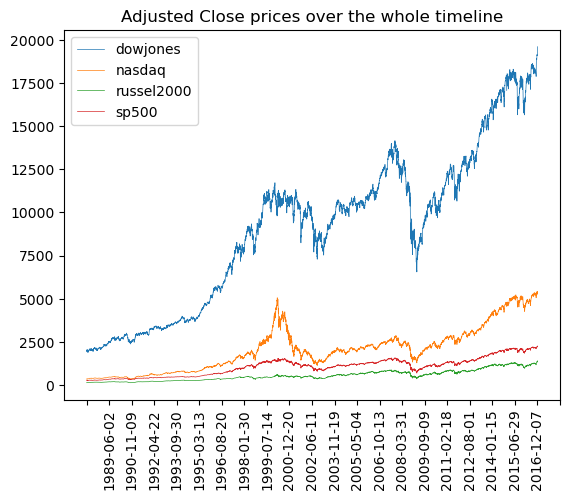

In [57]:
legend = ["dowjones", "nasdaq", "russel2000", "sp500"]
plot_price_data([df_dowjones, df_nasdaq, df_russel2000, df_sp500], legend, "Adj Close", "Adjusted Close prices over the whole timeline")

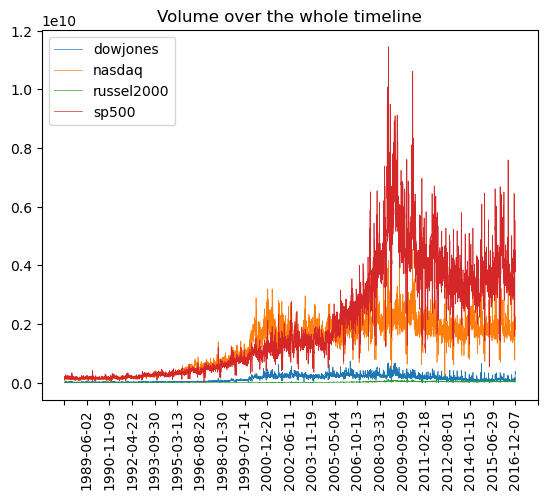

In [59]:
plot_price_data([df_dowjones, df_nasdaq, df_russel2000, df_sp500], legend, "Volume", "Volume over the whole timeline")